# Recreational center usage: how does it affect grades?

I was fortunate to get access to a large volume of data of student swipes at my university's recreational center. This is all swipes for a complete academic year, anonymized of course. 

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
raw_data = pd.read_excel('Anonymized - 2017 Summer, 2017 Fall, 2018 Spring CoRec Swipe Data.xlsx',header=1)
raw_data.head()

,PUID,Gender,Admission Population Group,Residency,Ethnicity,International?,Geocluster,URM,Citizenship Type,Nation of Citizenship,...,Spring Swipes,Fall?,Fall Swipes,Summer?,Summer Swipes,Year Swipes,Semesters,Per semester Swipe,CoRec User,Type of User
0,1,F,New First Time,Foreign,International,international,South Asia,N,A,Indonesia,...,10,T,20,T,39,69,3,23.0,T,Moderate
1,2,M,New First Time,Foreign,International,international,East Asia,N,A,China,...,0,T,1,F,0,1,2,0.5,T,Infrequent
2,3,M,New First Time,Foreign,International,international,South Asia,N,A,India,...,27,T,24,F,0,51,2,25.5,T,Moderate
3,4,M,New First Time,Non-Resident,White,domestic,USA,N,C,NaN,...,0,T,0,T,0,0,3,0.0,F,Zero use
4,5,F,New First Time,Resident,Black or African American,domestic,USA,Y,C,NaN,...,14,T,22,F,1,37,2,18.5,T,Moderate


In [113]:
data = raw_data
data = data[data['Overall GPA'].notna()]
X = data.loc[:, data.columns != 'Overall GPA']
y = data['Overall GPA']
X.head()

,PUID,Gender,Admission Population Group,Residency,Ethnicity,International?,Geocluster,URM,Citizenship Type,Nation of Citizenship,...,Spring Swipes,Fall?,Fall Swipes,Summer?,Summer Swipes,Year Swipes,Semesters,Per semester Swipe,CoRec User,Type of User
0,1,F,New First Time,Foreign,International,international,South Asia,N,A,Indonesia,...,10,T,20,T,39,69,3,23.0,T,Moderate
1,2,M,New First Time,Foreign,International,international,East Asia,N,A,China,...,0,T,1,F,0,1,2,0.5,T,Infrequent
2,3,M,New First Time,Foreign,International,international,South Asia,N,A,India,...,27,T,24,F,0,51,2,25.5,T,Moderate
3,4,M,New First Time,Non-Resident,White,domestic,USA,N,C,NaN,...,0,T,0,T,0,0,3,0.0,F,Zero use
4,5,F,New First Time,Resident,Black or African American,domestic,USA,Y,C,NaN,...,14,T,22,F,1,37,2,18.5,T,Moderate


### Exploratory data analysis and data cleaning

In [114]:
from pandas_profiling import ProfileReport

In [115]:
profile = ProfileReport(data)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [116]:
profile


Number of variables,61
Number of observations,39203
Total Missing (%),16.2%
Total size in memory,18.2 MiB
Average record size in memory,488.0 B
Numeric,19
Categorical,34
Boolean,0
Date,0
Text (Unique),0
Rejected,8


In [117]:
data.columns

Index(['PUID', 'Gender', 'Admission Population Group', 'Residency',
       'Ethnicity', 'International?', 'Geocluster', 'URM', 'Citizenship Type',
       'Nation of Citizenship', 'Residence Hall', 'Residence Hall Y/N',
       'Time Status', 'College', 'Academic School Grouping', 'Program',
       'Major 1', 'Major 2', 'Major 3', 'Major 4', 'Minor 1', 'Minor 2',
       'Minor 3', 'Minor 4', '1st Concentration', 'Classification', 'Year',
       'Level', 'Academic Standing', 'Semester Honors',
       'Spring Credits Attempted', 'Spring Credits Earned', 'Spring GPA',
       'Spring GPA points', 'Fall Credits Attempted', 'Fall Credits Earned',
       'Fall GPA', 'Fall GPA points', 'Summer Credits Attempted',
       'Summer Credits Earned', 'Summer GPA', 'Summer GPA points',
       'Year GPA points', 'Year Credits Attemped', 'Year credits earned',
       'Year GPA', 'Overall Credits Attempted', 'Overall Credits Earned',
       'Overall GPA', 'Spring?', 'Spring Swipes', 'Fall?', 'Fall Swipes'

Yikes, that's 60 columns. But there are a lot of columns that are highly collinear and some others that are missing a lot of values. We will remove these as they contain no information. We will use the results from our earlier profiling to select the columns to delete. We will remove all columns that have >50% missing values, which is not a totally unreasonable thing to do. It also happens that it is intuitively unlikely for these columns to have any effect on the outcome. 

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Populating the interactive namespace from numpy and matplotlib


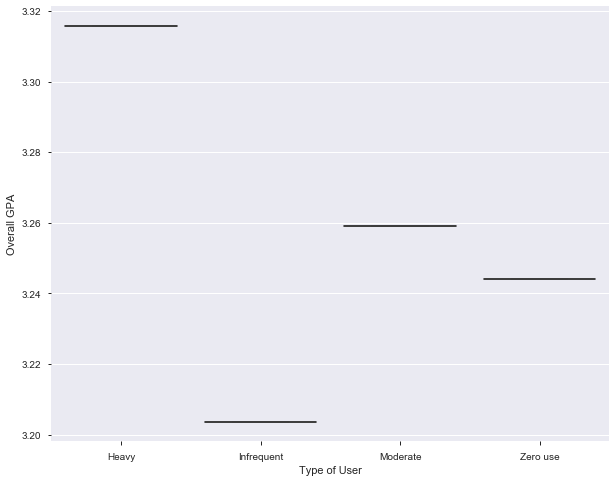

In [118]:
columns_to_drop = ['PUID','Major 2','Major 3','Major 4','Minor 1','Minor 2','Minor 3','Minor 4',
                   '1st Concentration','Overall Credits Attempted','Nation of Citizenship','Residence Hall']
data.drop(columns_to_drop, axis=1, inplace=True)


Populating the interactive namespace from numpy and matplotlib


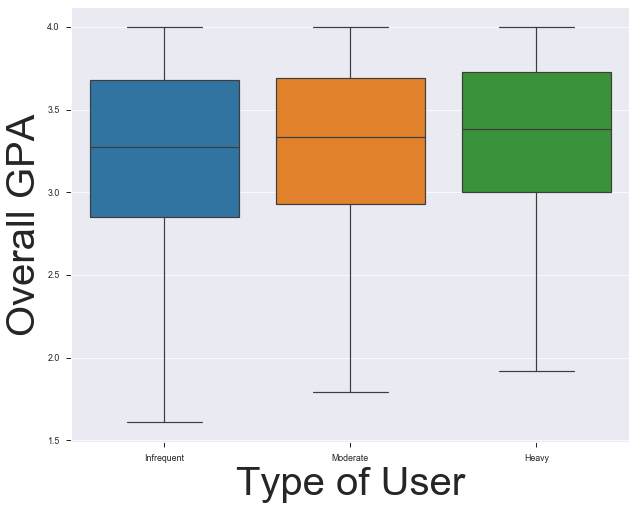

In [170]:
subset1 = data.loc[data['CoRec User'] == 'T']
subset1 = data.groupby('Type of User', as_index=False)['Overall GPA'].mean()
%pylab inline
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Type of User", y="Overall GPA", data=data.loc[data['CoRec User'] == 'T'],
                 showfliers=False, order=["Infrequent", "Moderate", "Heavy"])
sns.set_context("paper", rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":40})   
plt.show()

This is a fantastic early indication that the frequency of use is strongly correlated with GPA. 

In [172]:
data['Type of User'].value_counts()

Infrequent    15354
Moderate       9823
Zero use       7031
Heavy          6995
Name: Type of User, dtype: int64

In [121]:
swipe_cols = [col for col in data.columns if 'Swipe' in col]
data.drop(swipe_cols, axis=1, inplace=True)
data

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Admission Population Group,Residency,Ethnicity,International?,Geocluster,URM,Citizenship Type,Residence Hall Y/N,Time Status,...,Year credits earned,Year GPA,Overall Credits Earned,Overall GPA,Spring?,Fall?,Summer?,Semesters,CoRec User,Type of User
0,F,New First Time,Foreign,International,international,South Asia,N,A,N,Full Time,...,40.0,2.897500,79.0,3.325000,T,T,T,3,T,Moderate
1,M,New First Time,Foreign,International,international,East Asia,N,A,N,Full Time,...,28.0,3.440714,96.0,3.402151,T,T,F,2,T,Infrequent
2,M,New First Time,Foreign,International,international,South Asia,N,A,N,Full Time,...,30.0,3.381667,120.0,3.425217,T,T,F,2,T,Moderate
3,M,New First Time,Non-Resident,White,domestic,USA,N,C,N,Full Time,...,32.0,3.000000,88.0,3.968966,T,T,T,3,F,Zero use
4,F,New First Time,Resident,Black or African American,domestic,USA,Y,C,Y,Full Time,...,33.0,3.754545,84.0,3.675000,T,T,F,2,T,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,F,Transfer,Resident,Asian,Domestic,USA,N,P,N,Three Quarter Time,...,9.0,2.900000,15.0,3.880000,F,F,T,1,T,Heavy
39251,F,New First Time,Resident,Asian,Domestic,USA,N,C,N,Half Time,...,6.0,4.000000,15.0,3.880000,F,F,T,1,T,Heavy
39252,F,New First Time,Foreign,International,International,East Asia,N,A,N,Full Time,...,9.0,0.000000,15.0,3.880000,F,F,T,1,F,Zero use
39253,F,New First Time,Foreign,International,International,NaN,N,A,N,Full Time,...,9.0,0.000000,15.0,3.880000,F,F,T,1,T,Moderate


In [122]:
cat = len(data.select_dtypes(include=['object']).columns)
num = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  24 categorical + 19 numerical = 43 features


In [123]:
data.isnull().sum()

Gender                            0
Admission Population Group        0
Residency                         0
Ethnicity                         0
International?                    0
Geocluster                      579
URM                               0
Citizenship Type                 14
Residence Hall Y/N                0
Time Status                       0
College                           0
Academic School Grouping       4351
Program                           9
Major 1                           0
Classification                    0
Year                              0
Level                             0
Academic Standing                 0
Semester Honors               26274
Spring Credits Attempted         19
Spring Credits Earned            19
Spring GPA                       19
Spring GPA points                 0
Fall Credits Attempted            0
Fall Credits Earned               0
Fall GPA                          0
Fall GPA points                   0
Summer Credits Attempted    

We have to be careful about how we handle the missing values - for instance, NaN for residence hall could just mean that the student did not use on-campus housing. So, NaN in that case could actually provide useful information. From the above breakdown, this is what we will plan to do with the NaN values:
1. Geocluster: Impute with mode
2. Citizenship type: Leave as is- i.e., forms a unique value of its own
3. Academic School Grouping, Program: Impute with mode
4. Year GPA: Impute with median
5. Semester Honors: Leave as is
6. Spring Credits Attempted, Spring Credits Earned, Spring GPA: impute with median
All this magic happens below:

In [124]:
data['Geocluster'].fillna(data['Geocluster'].mode().iloc[0],inplace=True)
data['Academic School Grouping'].fillna(data['Academic School Grouping'].mode().iloc[0],inplace=True)
data['Program'].fillna(data['Program'].mode().iloc[0],inplace=True)
data['Year GPA'].fillna(data['Year GPA'].median(),inplace=True)
data['Spring Credits Attempted'].fillna(data['Spring Credits Attempted'].median(),inplace=True)
data['Spring Credits Earned'].fillna(data['Spring Credits Earned'].median(),inplace=True)
data['Spring GPA'].fillna(data['Spring GPA'].median(),inplace=True)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Now we are on to encoding the features. The categorical features are encoded using OneHotEncoder, the output is encoded using Label encoder. 

In [125]:
y = data.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y,columns=['Type of User'])

X = data.iloc[:,:-1]
X = pd.get_dummies(X, prefix_sep='_')

Now we will apply standard scaler to the features. 

In [141]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Looks fantastic. Let's train and test then. 

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
print('Dummy: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_dummy)))

Dummy: Accuracy=0.382


In [137]:
# Training the data and predicting 
# Logistic regression
from sklearn.linear_model import LogisticRegression
# fit a model
lrclf = LogisticRegression(solver='lbfgs',max_iter = 1000)
lrclf.fit(X_train, y_train)
y_pred_lr = lrclf.predict(X_test)
print('Logistic: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_lr)))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic: Accuracy=0.557


In [152]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=7, random_state=0,n_estimators=100)
rfclf.fit(X_train, y_train)
y_pred_rf = rfclf.predict(X_test)
print('Random Forest: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_rf)))

Random Forest: Accuracy=0.564


Let's see if we can improve the accuracy using an Adaboost classfier. 

In [156]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=200)
adaclf.fit(X_train, y_train)
y_pred_ada = adaclf.predict(X_test)
print('Bagging: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_ada)))

Bagging: Accuracy=0.563


In [ ]:
print (confusion_matrix(y_test, y_pred_lr))

